In [2]:
from examples.hot_cold import init_bprogram, params
from dfs.dfs_bprogram import DFSBProgram
import spot
from buddy import bddtrue
spot.setup()
params["n"] = 5

Elapsed time: 0.0336 seconds


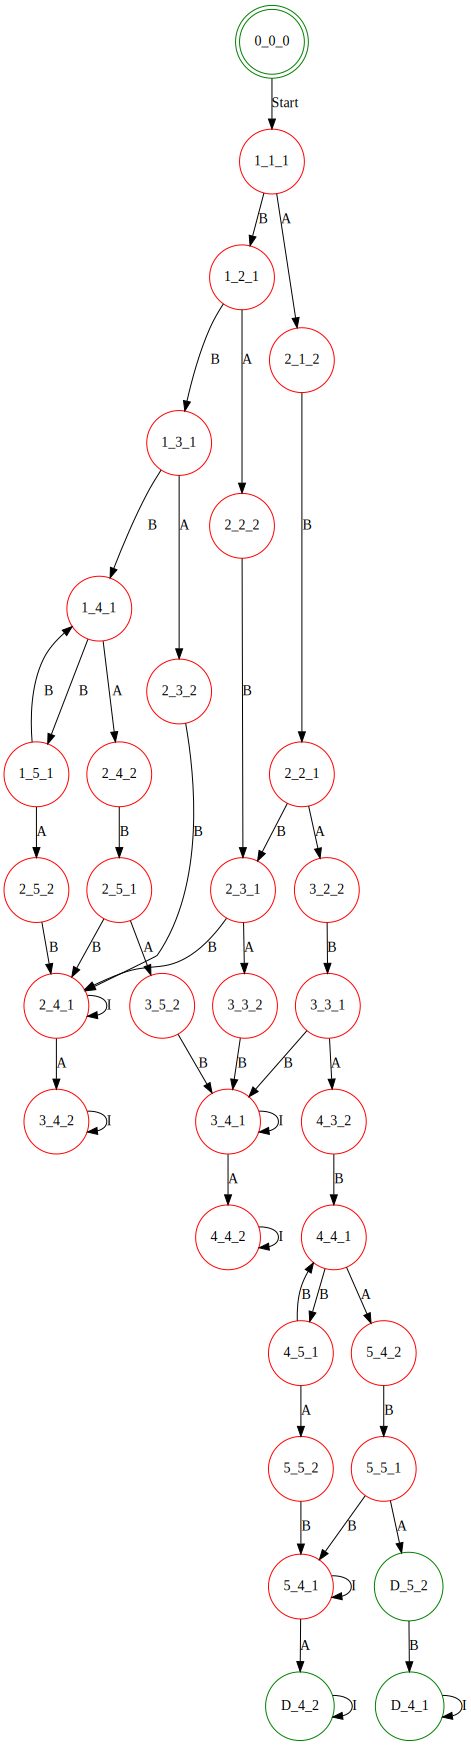

In [3]:
dfs = DFSBProgram(init_bprogram)
init, states = dfs.run()
graph = DFSBProgram.save_graph(init, states, "graph.dot")
graph

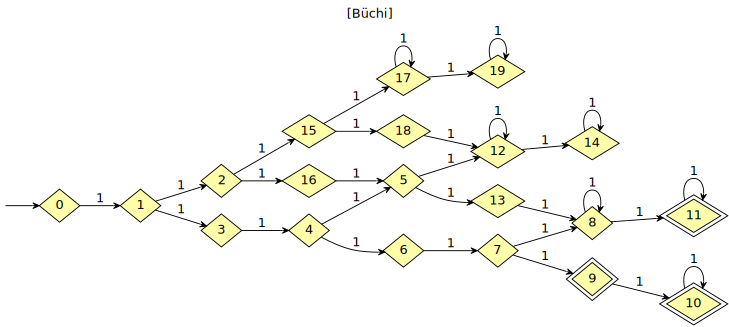

In [3]:
bdict = spot.make_bdd_dict()
game = spot.make_twa_graph(bdict)
game.new_states(len(states))
for s1 in states:
    for e, s2 in s1.transitions.items():
        if any(s2.must_finish):
            game.new_edge(s1.spot_id, s2.spot_id, bddtrue)
        else:
            game.new_edge(s1.spot_id, s2.spot_id, bddtrue, [0])

game.set_init_state(0)
game.set_buchi()
game.prop_state_acc(True)
spot.set_state_players(game, [True]*len(states))
game.show('.')  # Use "g" to hide the irrelevant edge labels.

In [6]:
print(game.to_str('hoa'))

RuntimeError: print_hoa(): automaton has transition-based acceptance despite prop_state_acc()==true

In [4]:
spot.solve_game(game)

True

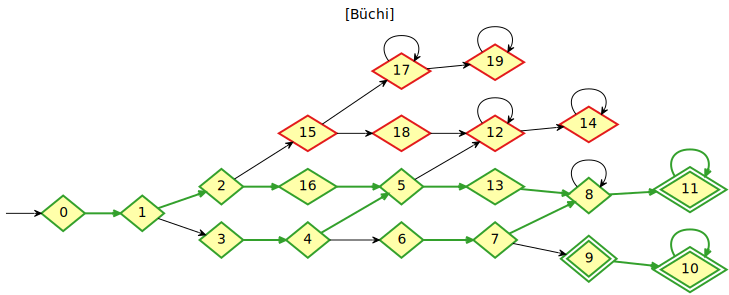

In [5]:
spot.highlight_strategy(game)
game.show('.g')

In [ ]:
print(spot.get_state_winners(game))

In [8]:
for i,b in enumerate(spot.get_state_winners(game)):
    print(i, ":", b)

0 : True
1 : True
2 : True
3 : True
4 : True
5 : True
6 : True
7 : True
8 : True
9 : True
10 : True
11 : False
12 : True
13 : False
14 : False
15 : True
16 : False
17 : False
18 : False
